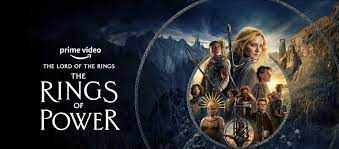

# "LOTR: The Rings of Power" Reviews Word Cloud

## Objective

In this lab, we are going to build a wordcloud of reviews posted on IMDB website for the popular webseries on amazon prime namely "LOTR:The Rings of Power". A wordcloud is an image of words where the size of each word is proportional to its frequency or importance in a document.

## Workflow

<ol>
<li> First of all, we will scrape IMDB website and construct the reviews dataframe to work with. We will use python's Requests and BeautifulSoup libraries to parse the html code and retrieve the data. </li>
<li>Next, we will preprocess the text and use wordcloud library to build our wordcloud.</li>
<li>Lastly, we will use flask, python's framwork to build website, to deploy our model on the web.</li>
</ol>

## WebScraping

Webscraping is the process of extracting data from websites for reserach, analysis, or other pusposes using software tools.

Steps to scrape a website in python:
<ol>
<li>Choose a website you want to scrape data from.</li>
<li>Inspect the website's HTML code to identify the data you want to extract.</li>
<li>Use a python's library like BeautifulSoup or Scrapy to parse the HTML code and extract the data.</li>
<li>Store the data in a structured format such as csv or json file.</li>
</ol>

In [1]:
# imports
import requests
from bs4 import BeautifulSoup

# make a request to the url
url = "https://www.imdb.com/title/tt7631058/reviews"
response = requests.get(url)

# parse the HTML code
soup = BeautifulSoup(response.content, "html.parser")
print(soup)


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>The Lord of the Rings: The Rings of Power (TV Series 2022– ) - The Lord of the Rings: The Rings of Power (TV Series 2022– ) - User Reviews - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/title/tt7631058/reviews" rel="canoni

Next, we need to figure out where the data required lies in a HTML script. For our project, we will keep the things simple and work with only 3 elements namely rating, title, and details of a review. We will use a variety of BeautifulSoup methods for parsing and manipulating these contents.

In [2]:
# create an empty list where we will append the 3 elements required as a tuple
reviews = list()
reviews.append(("Rating","Title","Details"))

# parse, manipulate, and append the contents 
for review in soup.find_all("div", class_="review-container"):
    try:
        rating = review.find("div", class_="ipl-ratings-bar").find("span", class_="").get_text()
    except:
        rating = "n/a"
    title = review.find("a", class_="title").get_text()
    details = review.find("div", class_="text show-more__control").get_text()
    reviews.append((rating, title, details))

Last but not least, lets store the data in a csv file. 

In [3]:
import csv

with open("reviews.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(reviews)

In [4]:
import pandas as pd
pd.read_csv("reviews.csv")

,Rating,Title,Details
0,5.0,I expected much better after all the hype\n,Ok So where to begin. I gave it a 2.5 stars or...
1,1.0,First Season - Disconnected Bits & Pieces Wit...,"To be fair, like the late Christopher Lee, I r..."
2,4.0,"2 Episodes in: ""It's okay.""\n",I honestly didn't really have any expectations...
3,6.0,i will be honest\n,I was expecting a total fiasco but I must admi...
4,7.0,Surprisingly good\n,"A pleasant surprise, the cinematography is imp..."
5,7.0,"Not as good as Jackson's films, but then agai...",It's inevitable that this gets compared to Jac...
6,10.0,I'm Feeling It So Far\n,"Though I've never done any of the reading, I'm..."
7,7.0,Very good so far\n,"I am enjoying this prequel so far, though it b..."
8,8.0,i have read the book and love this show\n,"This was great in my option, loved the Humans,..."
9,6.0,"Impressed so far, missing something though\n","Huge LOTR fan, love Tolkien and I enjoyed Pete..."
